## Preprocessing

In [47]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [48]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["NAME", "SPECIAL_CONSIDERATIONS"])

In [49]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                 34299
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
STATUS                  2
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [50]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df.value_counts('APPLICATION_TYPE')

application_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

In [51]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count[application_count<700].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [52]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.value_counts('CLASSIFICATION')
classification_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2380        1
C2500        1
C2561        1
C8210        1
Length: 71, dtype: int64

In [53]:
# You may find it helpful to look at CLASSIFICATION value counts >1
count_class = classification_count[classification_count > 1]
count_class

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C1720        6
C4100        6
C2400        6
C1600        5
C1257        5
C2710        3
C1260        3
C0           3
C1267        2
C1246        2
C1256        2
C3200        2
C1234        2
dtype: int64

In [54]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace =  classification_count[classification_count < 200].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [55]:

# ask_amt_count = application_df["ASK_AMT"].value_counts()


# ask_amt_to_replace =  ask_amt_count[ask_amt_count < 5].index.tolist()

# # Replace in dataframe
# for cls in ask_amt_to_replace:
#     application_df['ASK_AMT'] = application_df['ASK_AMT'].replace(cls,"Other")

# # Check to make sure binning was successful
# application_df['ASK_AMT'].value_counts()

In [56]:
# affiliation_count = application_df["AFFILIATION"].value_counts()
# affiliation_count

# Affiliation_to_replace =  affiliation_count[affiliation_count < 100].index.tolist()

# # Replace in dataframe
# for cls in ask_amt_to_replace:
#     application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(cls,"Other")

# # Check to make sure binning was successful
# application_df['AFFILIATION'].value_counts()

In [57]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,10520599,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10553066,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10556103,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
X = application_df.drop(columns='IS_SUCCESSFUL')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [59]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [60]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hiddenlayer1=300
hiddenlayer2=290
hiddenlayer3=280
# hiddenlayer4=30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hiddenlayer1, activation="sigmoid", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hiddenlayer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hiddenlayer3, activation="sigmoid"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=hiddenlayer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               13200     
                                                                 
 dense_13 (Dense)            (None, 290)               87290     
                                                                 
 dense_14 (Dense)            (None, 280)               81480     
                                                                 
 dense_15 (Dense)            (None, 1)                 281       
                                                                 
Total params: 182251 (711.92 KB)
Trainable params: 182251 (711.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=1000, batch_size = 1000)

Epoch 1/1000
26/26 [==============================] - 1s 20ms/step - loss: 0.6916 - accuracy: 0.5408
Epoch 2/1000
26/26 [==============================] - 0s 19ms/step - loss: 0.6427 - accuracy: 0.6559
Epoch 3/1000
26/26 [==============================] - 0s 19ms/step - loss: 0.5864 - accuracy: 0.7203
Epoch 4/1000
26/26 [==============================] - 0s 17ms/step - loss: 0.5766 - accuracy: 0.7228
Epoch 5/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.5748 - accuracy: 0.7256
Epoch 6/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.5765 - accuracy: 0.7247
Epoch 7/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.5749 - accuracy: 0.7240
Epoch 8/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.5727 - accuracy: 0.7260
Epoch 9/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.5725 - accuracy: 0.7261
Epoch 10/1000
26/26 [==============================] - 0s 18ms/step - loss: 0.5722 - accura

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6126 - accuracy: 0.7320 - 441ms/epoch - 2ms/step
Loss: 0.6126041412353516, Accuracy: 0.7320116758346558


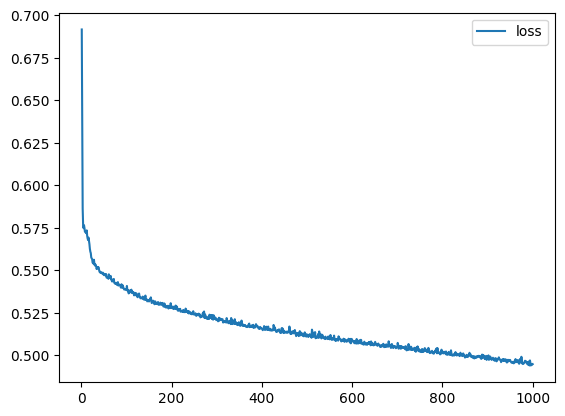

In [68]:
# Ploting the loss

import matplotlib.pyplot as plt


history_df = pd.DataFrame(fit_model.history)
history_df.index += 1

history_df.plot(y="loss")
plt.show()

In [67]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_1.h5')
files.download('/content/Model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>